In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label=LabelEncoder()

In [12]:
df['target']=label.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.duplicated().sum()

403

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df.shape

(5169, 2)

In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

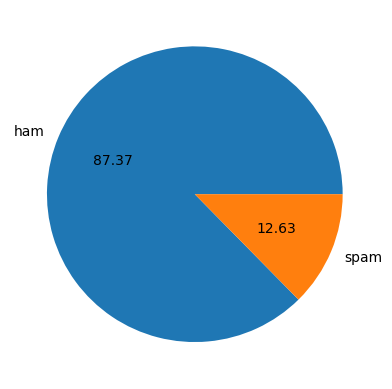

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DIVYANSHU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['num_char']=df['text'].apply(len)

In [23]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [28]:
import seaborn as sns

<Axes: >

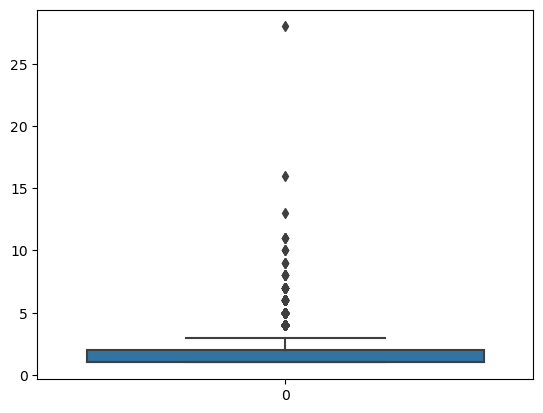

In [29]:
sns.boxplot(df['num_sent'])

<Axes: >

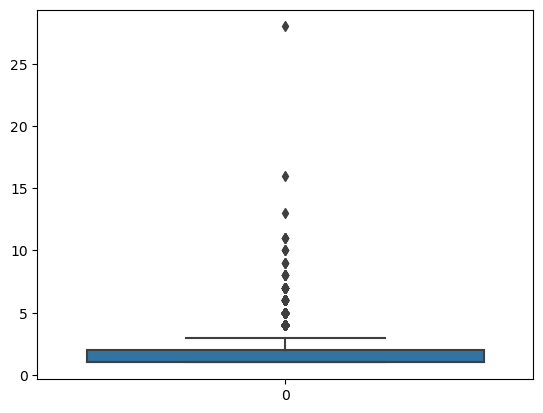

In [30]:
sns.boxplot(df['num_sent'])

<Axes: >

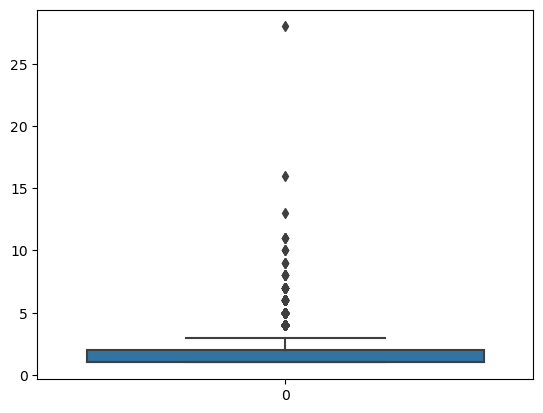

In [31]:
sns.boxplot(df['num_sent'])

C:\Users\DIVYANSHU\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DIVYANSHU\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_char', ylabel='Count'>

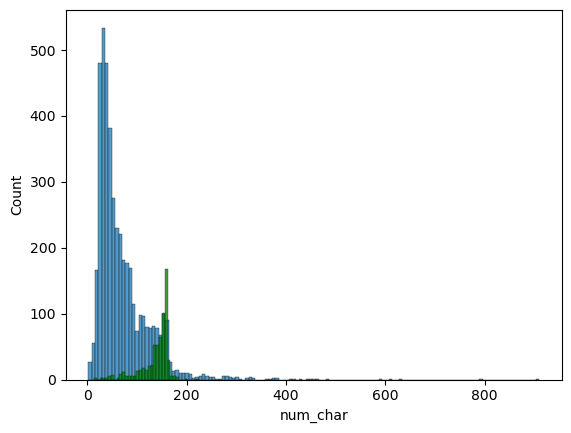

In [32]:
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='green')

C:\Users\DIVYANSHU\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DIVYANSHU\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_sent', ylabel='Count'>

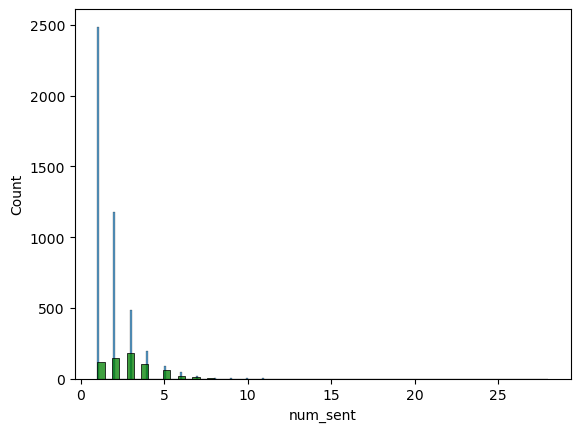

In [33]:
sns.histplot(df[df['target']==0]['num_sent'])
sns.histplot(df[df['target']==1]['num_sent'],color='green')

C:\Users\DIVYANSHU\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DIVYANSHU\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

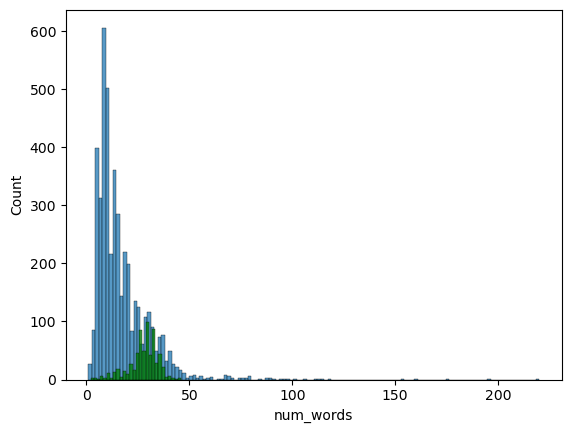

In [34]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='green')

C:\Users\DIVYANSHU\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DIVYANSHU\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\DIVYANSHU\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DIVYANSHU\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need 

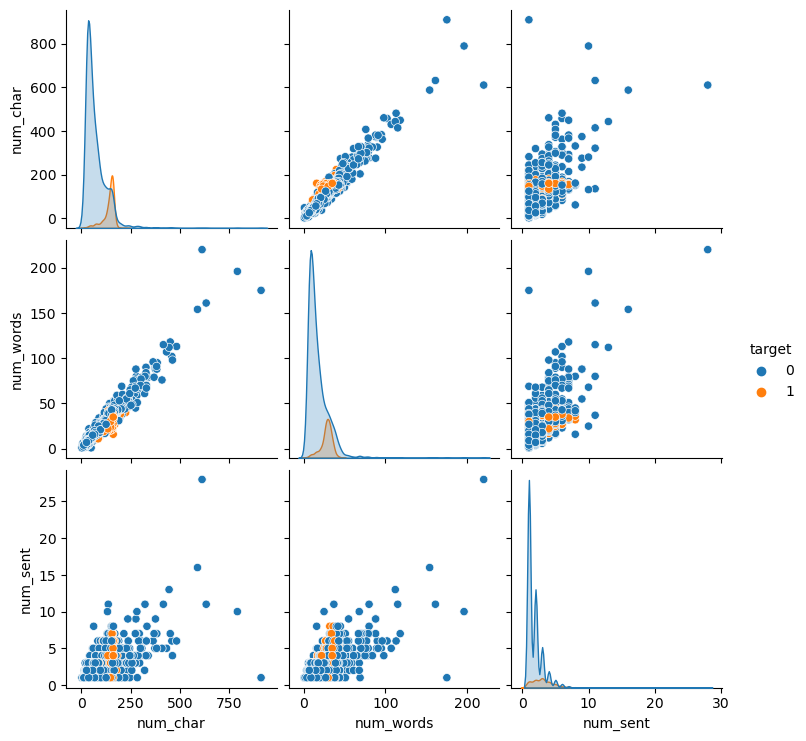

In [35]:
sns.pairplot(df,hue='target')

In [36]:
new=df.iloc[:,[0,2,3,4]]

In [37]:
df.head()

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [38]:
new.head()

,target,num_char,num_words,num_sent
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1


<Axes: >

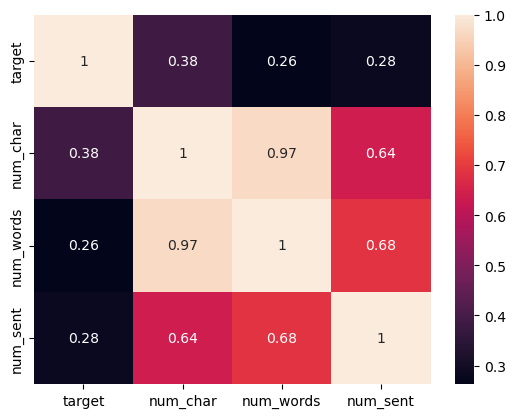

In [39]:
sns.heatmap(new.corr(),annot =True)

In [40]:
df.drop(columns=['num_words','num_sent'],inplace=True)

In [41]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [42]:
df.shape

(5169, 3)

In [43]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
from nltk.corpus import stopwords 

In [45]:
nltk.download('stopwords')
#stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DIVYANSHU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    #print(text)
    y=[]
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            if i.isalnum():
                y.append(ps.stem(i))
                    
        
    return " ".join(y)

In [47]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('raghvi')

'raghvi'

In [48]:
df['text'][69]

'I plane to give on this month end.'

In [49]:
transform_text(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [50]:
df['transformed_text']=df['text'].apply(transform_text)

In [51]:
df.head()

,target,text,num_char,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


In [52]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [53]:
spam_wc= wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

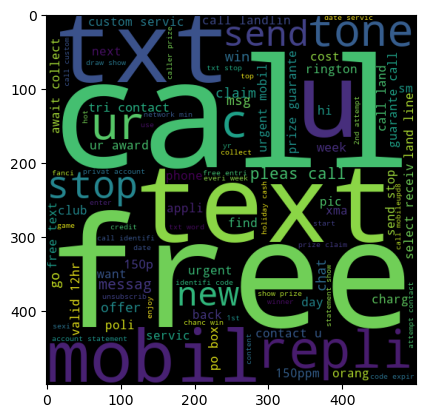

In [54]:
plt.imshow(spam_wc)

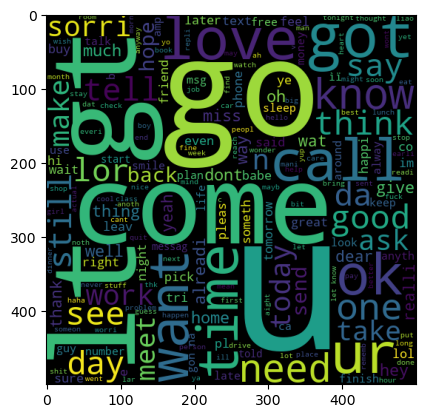

In [55]:
not_spam_wc= wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(not_spam_wc)

In [56]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text']:
    for word in msg.split():
        spam_corpus.append(word)

In [57]:
len(spam_corpus)

9939

In [58]:
from collections import Counter
spam_corpus=Counter(spam_corpus).most_common(30)

In [59]:
spam_corpus_df=pd.DataFrame(spam_corpus)

In [60]:
spam_corpus_df

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


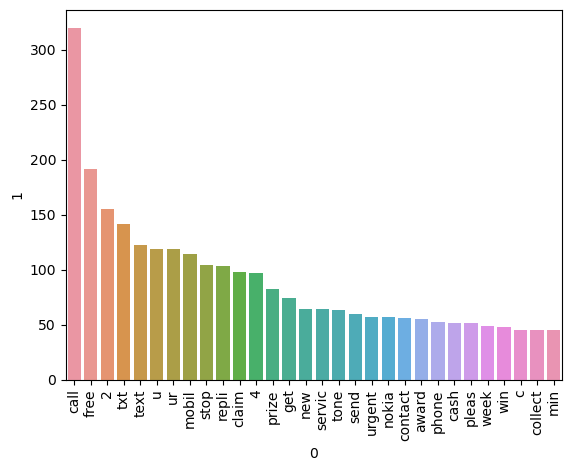

In [61]:
sns.barplot(x=spam_corpus_df[0],y=spam_corpus_df[1])
plt.xticks(rotation='vertical')
plt.show()

In [62]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [63]:

ham_corpus=Counter(ham_corpus).most_common(30)

In [64]:
ham_corpus_df= pd.DataFrame(ham_corpus)

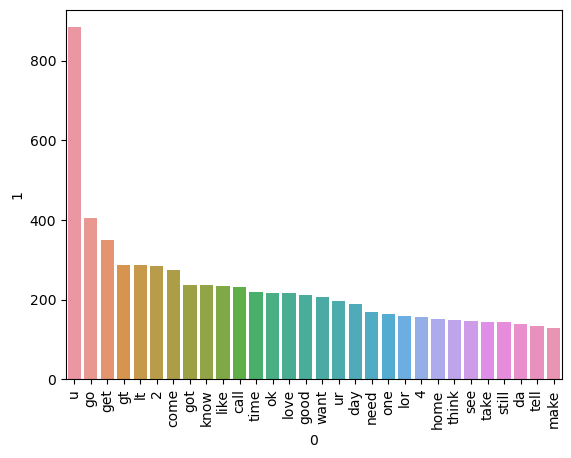

In [65]:
sns.barplot(x=ham_corpus_df[0],y=ham_corpus_df[1])
plt.xticks(rotation='vertical')
plt.show()

In [66]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [67]:
cv =CountVectorizer()
tfidf=TfidfVectorizer()
X= tfidf.fit_transform(df['transformed_text']).toarray()

In [68]:
X.shape

(5169, 6708)

In [69]:
y= df['target'].values

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2,random_state=2)

In [71]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [72]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

In [73]:
gnb= GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [74]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [75]:
mnb.fit(X_train,y_train)
y_pred2_tf=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2_tf))
print(confusion_matrix(y_test,y_pred2_tf))
print(precision_score(y_test,y_pred2_tf))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [76]:
mnb.fit(X_train,y_train)
y_pred2_tf=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2_tf))
print(confusion_matrix(y_test,y_pred2_tf))
print(precision_score(y_test,y_pred2_tf))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [77]:
bnb.fit(X_train,y_train)
y_pred3_tf=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3_tf))
print(confusion_matrix(y_test,y_pred3_tf))
print(precision_score(y_test,y_pred3_tf))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [78]:
bnb.fit(X_train,y_train)
y_pred3_tf=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3_tf))
print(confusion_matrix(y_test,y_pred3_tf))
print(precision_score(y_test,y_pred3_tf))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [80]:
svc= SVC(kernel ='sigmoid',gamma=1.0)
knc= KNeighborsClassifier()
mnb= MultinomialNB()
dtc =DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc= RandomForestClassifier(n_estimators=50, random_state=2)
abc= AdaBoostClassifier(n_estimators=50,random_state=2)
bc= BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [81]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [82]:

data=[]
for i in clfs:
    clfs[i].fit(X_train,y_train)
    y_pred= clfs[i].predict(X_test)
    
    acc=accuracy_score(y_test,y_pred)
    prec= precision_score(y_test,y_pred)
    data.append([[i,acc,prec]])
    

In [83]:
list1=[]
for i in range(11):
    list2=[]
    for j in range(3):
        list2.append(data[i][0][j])
    list1.append(list2)

In [84]:
list1

[['SVC', 0.9729206963249516, 0.9741379310344828],
 ['KN', 0.9003868471953579, 1.0],
 ['NB', 0.9593810444874274, 1.0],
 ['DT', 0.9352030947775629, 0.8380952380952381],
 ['LR', 0.9516441005802708, 0.94],
 ['RF', 0.9738878143133463, 1.0],
 ['AdaBoost', 0.9613152804642167, 0.9454545454545454],
 ['BgC', 0.9584139264990329, 0.8625954198473282],
 ['ETC', 0.9758220502901354, 0.9829059829059829],
 ['GBDT', 0.9526112185686654, 0.9238095238095239],
 ['xgb', 0.9729206963249516, 0.9365079365079365]]

In [85]:
datadf_dict=pd.DataFrame(list1,columns=['model','accuracy','precision'])

In [86]:
datadf_dict

,model,accuracy,precision
0,SVC,0.972921,0.974138
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
3,DT,0.935203,0.838095
4,LR,0.951644,0.940000
5,RF,0.973888,1.000000
6,AdaBoost,0.961315,0.945455
7,BgC,0.958414,0.862595
8,ETC,0.975822,0.982906
9,GBDT,0.952611,0.923810


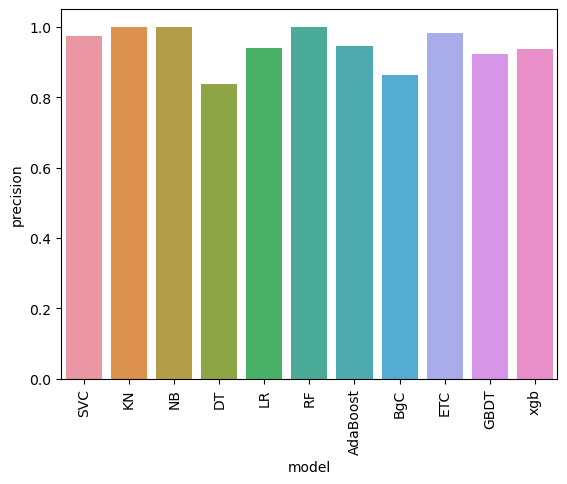

In [87]:
sns.barplot(datadf_dict,x='model',y='precision')
plt.xticks(rotation='vertical')
plt.show()

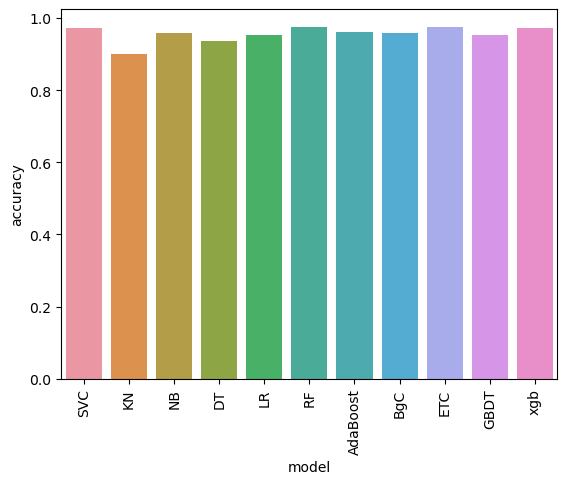

In [88]:
sns.barplot(datadf_dict,x='model',y='accuracy')
plt.xticks(rotation='vertical')
plt.show()

In [89]:
import pickle

In [90]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))

In [91]:
pickle.dump(rfc,open('model.pkl','wb'))

In [92]:
df.head()

,target,text,num_char,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


In [95]:
df.iloc[2:,:]

,target,text,num_char,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,even brother like speak treat like aid patent
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,guy bitch act like interest buy someth els nex...


In [99]:
df.iloc[2:3,:].values

array([[1,
        "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
        155,
        'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18']],
      dtype=object)